# Интерполационна формула на Нютон. Някои практически въпроси, свързани с интерполацията.

### Задача 1

Да се напише функция _divided_difference(nodes, values)_, където _nodes_ е списък с точки от реалната права, а _values_ -- списък с реални стойности. Функцията да изчислява разделената разлика на функция със стойности _values_ в точките _nodes_.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def divided_difference(nodes, values, x):
    n = len(nodes)
    if n == 1:
        return values[0]
    return (divided_difference(nodes[1:], values[1:], x) - divided_difference(nodes[0:n-1], values[0:n-1], x))/(nodes[n-1] - nodes[0])

### Задача 2
Да се напише функция *newton_poly(nodes, values, x)*, която връща стойността на интерполационния полином на Лагранж, с възли _nodes_ и съответни стойности _values_ в т. _x_.

In [3]:
def newton_Poly(nodes, values, x):
    p = 0
    n = len(nodes)
    for i in range(0, n):
        q = divided_difference(nodes[0:i+1], values[0:i+1], x)
        for j in range(0, i):
             q *= (x-nodes[j]) 
       # print(q)
        
        p += q

    return p
        

### Задача 3
В таблицата са дадени данни за населението на САЩ в периода 1920-1990. Да се построи
полином от седма степен, интерполиращ таблицата. Да се даде приближение на населението
през 1952, 1974, 2000 година и да се сравни с действителните стойности --
съответно 157 млн., 214 млн., 281.42 млн.


| Година| 1920 | 1930 | 1940 | 1950 | 1960 | 1970 | 1980 | 1990 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Население | 106.46 | 123.08 | 132.12 | 152.27 | 180.67 | 205.05 | 227.23 | 249.46 |


In [8]:
x = np.linspace(1920, 2001, 100)
years = np.array([1920 ,1930, 1940 , 1950 , 1960 ,1970 , 1980 , 1990])
population = np.array([106.46 , 123.08 , 132.12 , 152.27 , 180.67 , 205.05 ,227.23 , 249.46 ])

pol1 = newton_Poly(years, population, 1952)
print(abs(pol1 - 157))
pol2 = newton_Poly(years, population, 1974)
print(abs(pol2 - 214))
pol3 = newton_Poly(years, population, 2000)
print(abs(281.42 - pol3))
 

newPop = np.array([157, 214, 281.42])
newYears = np.array([1952, 1974, 2000])

0.728026265599965
0.489468723199991
106.33999999999787


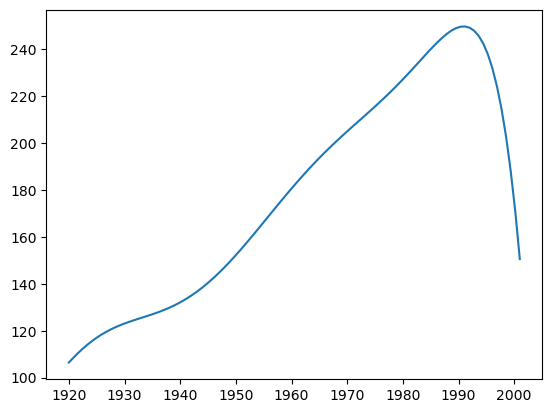

In [9]:
plt.plot(x, newton_Poly(years, population, x))
plt.show()

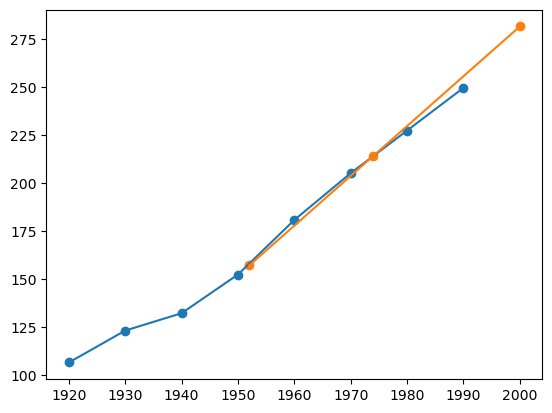

In [10]:
plt.scatter(years, population)
x = np.linspace(1920, 2001)
plt.plot(years, population)
plt.scatter(newYears, newPop)
plt.plot(newYears, newPop)


In [11]:

newPop = np.array([157, 214, 281.42])
newYears = np.array([1952, 1974, 2000])


### Задача 4

Дадена е функцията на Рунге $ f(x)=\dfrac{1}{1+25x^2}$. Да се приближи $ f(x) $ в интервала $x \in [-1,1],$ като се използват интерполационни полиноми от степени 10 и 4 с равноотдалечени възли. 
Да се построят графиките на всеки от полиномите, заедно с графиката на функцията в една координатна система, както и графиките на абсолютната грешка по модул в двата случая.


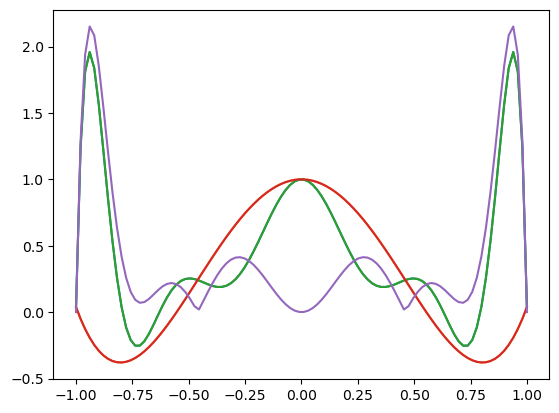

In [18]:
x11 = np.linspace(-1, 1, 11)
x=np.linspace(-1, 1, 100)
x1 = np.linspace(-1, 1, 5)

def g(x):
    return 1/(1 + 25*x**2)
    


pol = newton_Poly(x11, g(x11), x)
pol1 = newton_Poly(x1, g(x1), x)
plt.plot(x, pol)
plt.plot(x, pol1)

def absError(x):
    return abs(pol - pol1)
    
plt.plot(x, pol)
plt.plot(x, pol1)
plt.plot(x, absError(x))



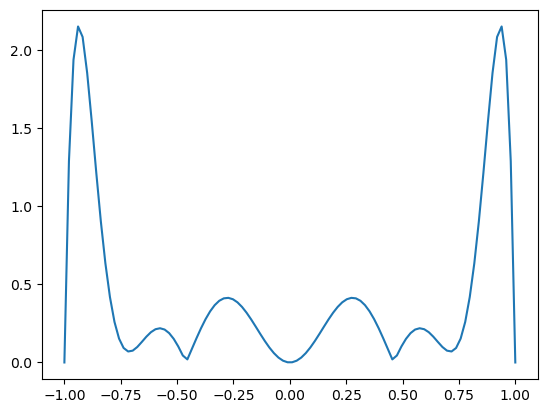

In [17]:
plt.plot(x, absError(x))

### Задача 5

Известно е (вж. лекции), че най-добрите възли за интерполация в интервала $[-1,1]$ са т.нар. Чебишови възли, които се задават по формулата:

$\xi_k = \cos \left( \dfrac{2k-1}{2n} \pi \right), k=1,\dots,n$


Да се построи интерполационен полином от 10-та степен за функцията на Рунге, като за целта се използват съответните Чебишови възли в интервала $[-1,1]$. Да се построи графика на абсолютната грешка.

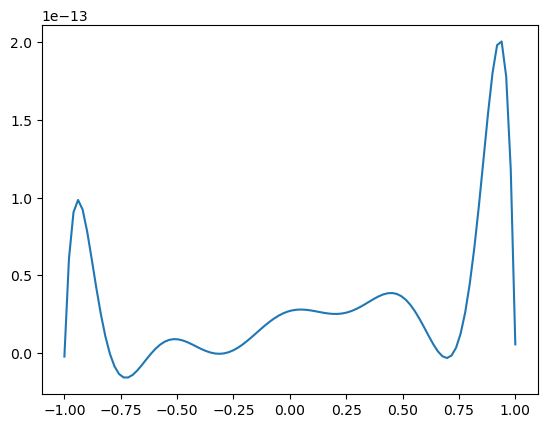

In [20]:
x = np.linspace(-1, 1, 100)
x1 = np.linspace(-1, 1, 11)

n = 11
points = np.array([np.cos((2*k-1)*np.pi/2*n) for k in range(1, n+1)])
pcos = newton_Poly(x1, points, x);
plt.plot(x, pcos)


### Задача 6

Проведени са експерименти за определяне бързодействието на един алгоритъм за сортиране в зависимост от броя входни елементи. Резултатите са представени в следната таблица:


| Брой елементи (x1000) | 10 | 20 | 50 | 100 | 150 | 200 | 250 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Време (сек.) | 0.163928 | 0.53282 | 3.00007 | 11.2078 | 26.7487 | 47.3297 | 76.8061 |

Да се определи приблизително колко елемента могат да се сортират за 30 сек.

import sympy
x = sympy.symbols('x')

nodes = np.array([10, 20, 50, 100, 150, 200, 250])

values = np.array(
    [0.163928 , 0.53282 ,3.00007 , 11.2078 , 26.7487 , 47.3297 , 76.8061]
)
eq = sympy.Eq(newton_Poly(nodes, values, x), 30)
result = sympy.solve(eq, x)
print(result)



In [ ]:
import sympy
x = sympy.symbols('x')

nodes = np.array([10, 20, 50, 100, 150, 200, 250])

values = np.array(
    [0.163928 , 0.53282 ,3.00007 , 11.2078 , 26.7487 , 47.3297 , 76.8061]
)
eq = sympy.Eq(newton_Poly(nodes, values, x), 30)
result = sympy.solve(eq, x)
print(result)
